<a href="https://colab.research.google.com/github/jakub-porowski/PwcRecruitmentTask/blob/main/INDPRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [110]:
Case = pd.read_csv("/content/clean_csv.csv", sep=";")
Case = Case.drop(axis=0, index=0)

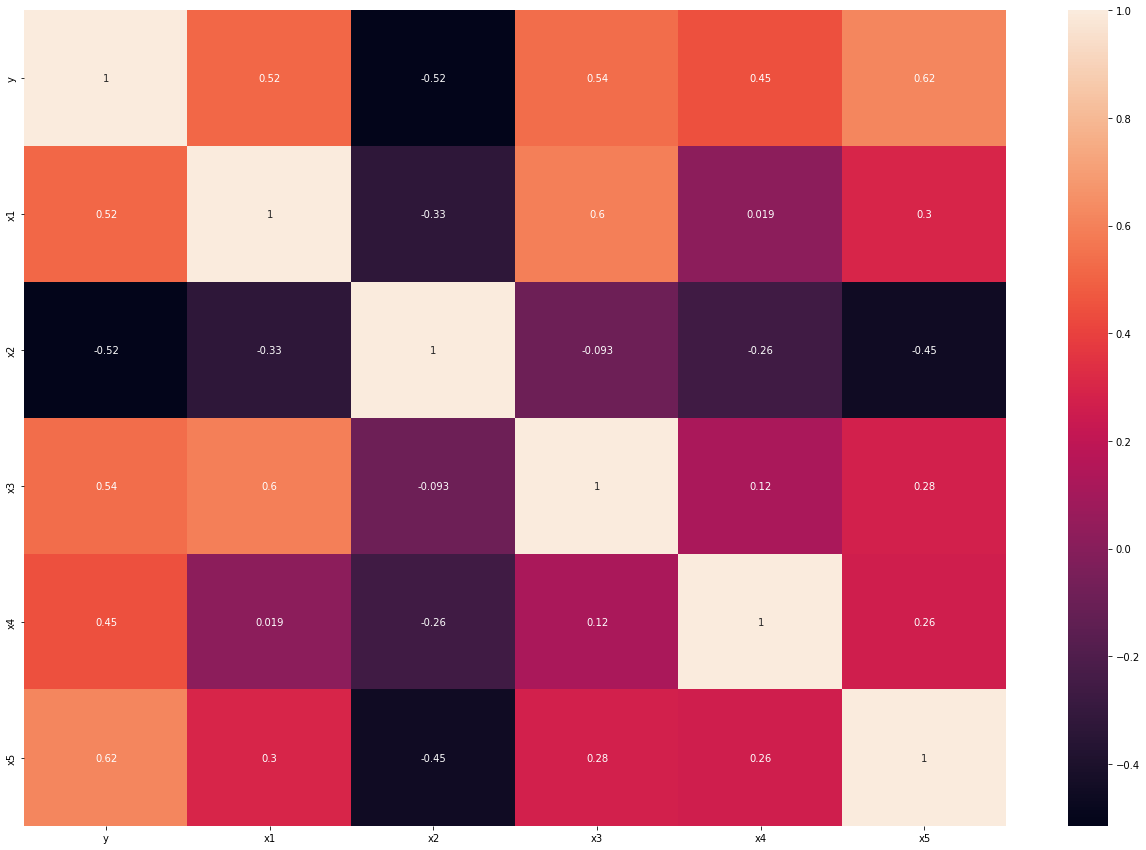

In [111]:
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(Case.corr(), annot=True, ax=ax);

In [112]:
ToDrop = ["x1","x2","x3","x4","x5"]
Data = Case.drop(columns=["y"])
Target = Case["y"]

In [113]:
X_train, X_test, y_train, y_test = train_test_split(Data, Target, test_size=.15, random_state=100)

In [114]:
LR = LinearRegression()
LR.fit(X_train, y_train)
predLR = LR.predict(X_test)
r2_score(y_test, predLR)

0.7479323961752136

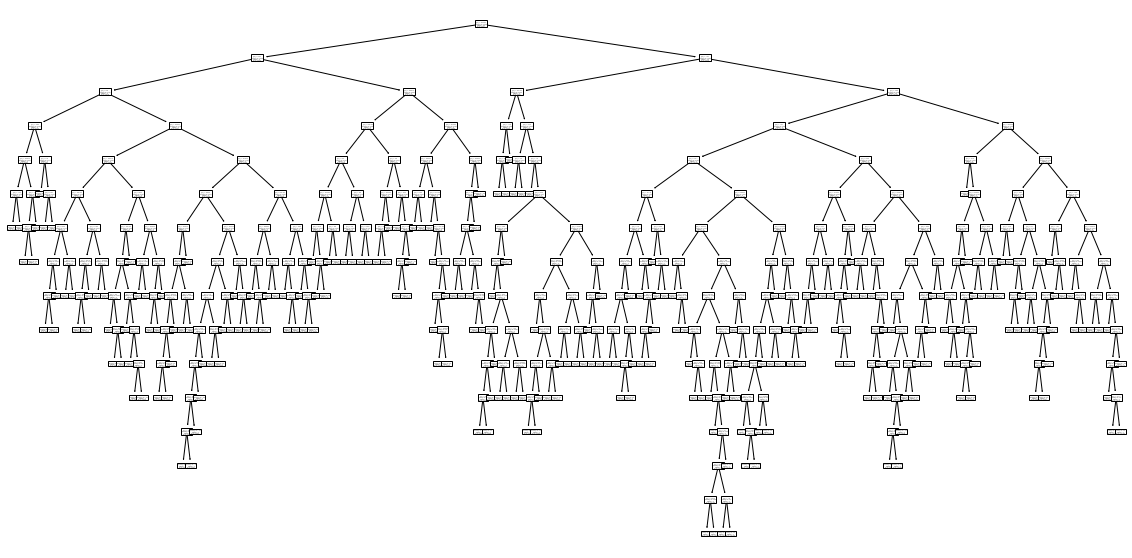

0.9246361450250703

In [115]:
Tree = DecisionTreeRegressor()
Tree.fit(X_train, y_train)
plot_tree(Tree)
plt.show()
predTree = Tree.predict(X_test)
r2_score(y_test, predTree)

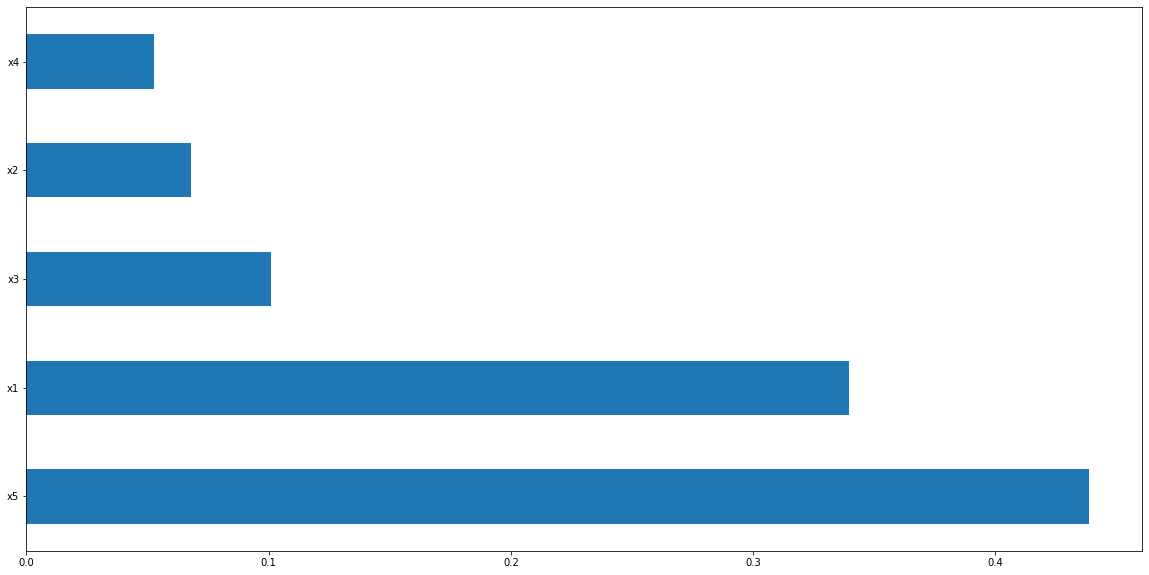

In [116]:
plt.rcParams["figure.figsize"] = (20,10)
feat_importances = pd.Series(Tree.feature_importances_, index=Data.columns)
feat_importances.nlargest(50).plot(kind='barh')

In [117]:
YPredictionFeatureValues = pd.read_excel("/content/Target.xlsx")
YpredictionResult = Tree.predict(YPredictionFeatureValues)
YpredictionResult

array([104.7474])